In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
%matplotlib inline

tf.set_random_seed(777)  # reproducibility

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

In [7]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.12489946 0.1254848  0.13531944 0.16463207 0.12071709]] -> [0.13644068]
[[0.12122754 0.12022427 0.11893681 0.23269696 0.11028333]
 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.09788123 0.09815542 0.19215739 0.09180565]
 [0.09019209 0.11594643 0.10839633 0.14979833 0.12482645]
 [0.12489946 0.1254848  0.13531944 0.16463207 0.12071709]
 [0.11583649 0.13036959 0.12967071 0.14211706 0.13644068]] -> [0.15869256]
[[0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.09788123 0.09815542 0.19215739 0.09180565]
 [0.09019209 0.11594643 0.10839633 0.14979833 0.12482645]
 [0.12489946 0.1254848  0.13531944 0.16463207 0.12071709]
 [0.11583649 0.13036959 0.12967071 0.14211706 0.13644068]
 [0.13506965 0.15892701 0.15455436 0.37437483 0.15869256]] -> [0.21132781]
[[0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.097881

 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]] -> [0.61937271]
[[0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]
 [0.58392324 0.59861172 0.60591312 0.14174061 0.6072485 ]
 [0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]
 [0.62340942 0.62852456 0.62589623 0.20037645 0.61937271]] -> [0.59809726]
[[0.58392324 0.59861172 0.60591312 0.14174061 0.6072485 ]
 [0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]
 [0.62340942 0.62852456 0.62589623 0.20037645 0.61937271]
 [0.59933883 0.62118299 0.61656493 0.22167249 0.59809726]] -> [0.65941725]
[[0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.613985

 [0.87661644 0.86967137 0.86986042 0.21685041 0.85098408]] -> [0.84827366]
[[0.90409666 0.92262369 0.93095419 0.15143856 0.93424998]
 [0.93842481 0.92695931 0.93189321 0.14058439 0.91839536]
 [0.90829299 0.8989223  0.90601198 0.14697499 0.89333115]
 [0.89273156 0.8888348  0.89186826 0.24570225 0.8824893 ]
 [0.91415021 0.92351971 0.89800118 0.38200233 0.88254764]
 [0.87661644 0.86967137 0.86986042 0.21685041 0.85098408]
 [0.83995704 0.84836907 0.84503552 0.21497714 0.84827366]] -> [0.80481927]
[[0.93842481 0.92695931 0.93189321 0.14058439 0.91839536]
 [0.90829299 0.8989223  0.90601198 0.14697499 0.89333115]
 [0.89273156 0.8888348  0.89186826 0.24570225 0.8824893 ]
 [0.91415021 0.92351971 0.89800118 0.38200233 0.88254764]
 [0.87661644 0.86967137 0.86986042 0.21685041 0.85098408]
 [0.83995704 0.84836907 0.84503552 0.21497714 0.84827366]
 [0.82628985 0.82570836 0.809559   0.16711482 0.80481927]] -> [0.78567131]
[[0.90829299 0.8989223  0.90601198 0.14697499 0.89333115]
 [0.89273156 0.888834

In [8]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

In [9]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [10]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.layers.dense(
    outputs[:, -1], output_dim, activation=None)  # We use the last cell's output

In [11]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [12]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 120.23833465576172
[step: 1] loss: 73.46892547607422
[step: 2] loss: 39.22847366333008
[step: 3] loss: 17.684751510620117
[step: 4] loss: 9.289350509643555
[step: 5] loss: 12.563090324401855
[step: 6] loss: 20.068111419677734
[step: 7] loss: 23.234128952026367
[step: 8] loss: 20.652263641357422
[step: 9] loss: 15.160762786865234
[step: 10] loss: 9.661199569702148
[step: 11] loss: 5.790841102600098
[step: 12] loss: 3.950040578842163
[step: 13] loss: 3.754763126373291
[step: 14] loss: 4.508398056030273
[step: 15] loss: 5.5278215408325195
[step: 16] loss: 6.30570650100708
[step: 17] loss: 6.5569376945495605
[step: 18] loss: 6.202532768249512
[step: 19] loss: 5.32759952545166
[step: 20] loss: 4.131349086761475
[step: 21] loss: 2.874295711517334
[step: 22] loss: 1.821648359298706
[step: 23] loss: 1.1820601224899292
[step: 24] loss: 1.0481586456298828
[step: 25] loss: 1.3576685190200806
[step: 26] loss: 1.903512716293335
[step: 27] loss: 2.4101381301879883
[step: 28] loss: 2.

[step: 241] loss: 0.6922609210014343
[step: 242] loss: 0.6909487843513489
[step: 243] loss: 0.6896386742591858
[step: 244] loss: 0.6883307099342346
[step: 245] loss: 0.6870248317718506
[step: 246] loss: 0.6857211589813232
[step: 247] loss: 0.6844198703765869
[step: 248] loss: 0.6831207871437073
[step: 249] loss: 0.6818243265151978
[step: 250] loss: 0.6805301904678345
[step: 251] loss: 0.6792387366294861
[step: 252] loss: 0.6779497861862183
[step: 253] loss: 0.6766635179519653
[step: 254] loss: 0.6753798127174377
[step: 255] loss: 0.6740989685058594
[step: 256] loss: 0.6728211045265198
[step: 257] loss: 0.6715460419654846
[step: 258] loss: 0.6702737808227539
[step: 259] loss: 0.6690047383308411
[step: 260] loss: 0.6677389144897461
[step: 261] loss: 0.6664758920669556
[step: 262] loss: 0.665216326713562
[step: 263] loss: 0.6639599800109863
[step: 264] loss: 0.6627068519592285
[step: 265] loss: 0.6614571809768677
[step: 266] loss: 0.6602110266685486
[step: 267] loss: 0.6589682698249817
[s

[step: 467] loss: 0.5045067667961121
[step: 468] loss: 0.5040497183799744
[step: 469] loss: 0.5035931468009949
[step: 470] loss: 0.5031370520591736
[step: 471] loss: 0.5026814937591553
[step: 472] loss: 0.5022265315055847
[step: 473] loss: 0.5017719864845276
[step: 474] loss: 0.5013178586959839
[step: 475] loss: 0.5008642077445984
[step: 476] loss: 0.5004110336303711
[step: 477] loss: 0.49995824694633484
[step: 478] loss: 0.4995057284832001
[step: 479] loss: 0.4990537762641907
[step: 480] loss: 0.4986022412776947
[step: 481] loss: 0.49815091490745544
[step: 482] loss: 0.4977000951766968
[step: 483] loss: 0.49724945425987244
[step: 484] loss: 0.4967993199825287
[step: 485] loss: 0.4963495135307312
[step: 486] loss: 0.49589991569519043
[step: 487] loss: 0.4954507350921631
[step: 488] loss: 0.4950018525123596
[step: 489] loss: 0.4945532977581024
[step: 490] loss: 0.49410495162010193
[step: 491] loss: 0.49365702271461487
[step: 492] loss: 0.4932094216346741
[step: 493] loss: 0.492762058973

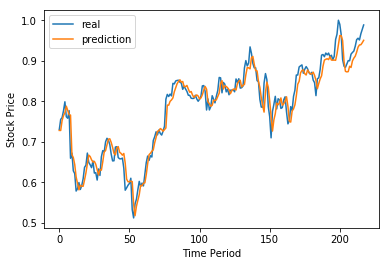

In [13]:
with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth =True))) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    
    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.legend(['real', 'prediction'])
    plt.show()